### Selecting k best features
   - one of the scoring functions (f_regression for F-values)
   - Linear model for testing the individual effect of each of many regressors
   - Precision - ability of classifier NOT to label as positive a sample that is negative
   - Recall - ability of the classifier to find all the positive samples
   - F-score = 2*(precision * recall)/(precision + recall)

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression 


from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, scorer



In [3]:
boston_dataset = datasets.load_boston()

In [4]:
X_full = boston_dataset.data
y = boston_dataset.target

print(X_full.shape)
print(y.shape)

(506, 13)
(506,)


In [5]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
print(boston_dataset.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## SelectKBest(score_func, k = 10)
 - Select features according to the k highest scores

In [7]:
# Select the top two features to use for Linear Regression

selector = SelectKBest(f_regression, k=2)
selector.fit(X_full, y)

SelectKBest(k=2, score_func=<function f_regression at 0x126bb52f0>)

In [8]:
selector.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True])

In [9]:
print(boston_dataset.feature_names[selector.get_support()])

['RM' 'LSTAT']


In [10]:
selector.scores_

array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
       112.59148028, 471.84673988,  83.47745922,  33.57957033,
        85.91427767, 141.76135658, 175.10554288,  63.05422911,
       601.61787111])

In [11]:
X = X_full[:, selector.get_support()]
print(X.shape)

(506, 2)


In [12]:
def plot_scatter(X,Y,R=None):
    plt.scatter(X, Y, s=32, marker='o', facecolors='none', edgecolors='k')
    if R is not None:
        plt.scatter(X, R, color='red', linewidth=0.5)
    plt.show()    

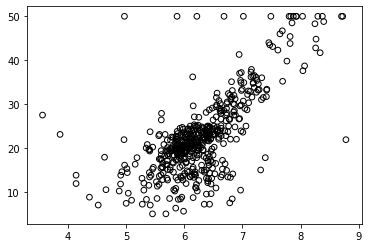

In [13]:
plot_scatter(X[:,0], y)

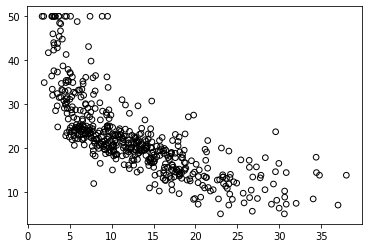

In [14]:
plot_scatter(X[:,1], y)

In [15]:
regressor = LinearRegression(normalize=True).fit(X, y)
y_pred    = regressor.predict(X)

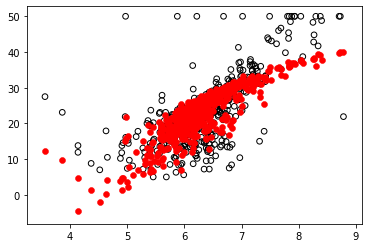

In [16]:
plot_scatter(X[:,0], y, y_pred)

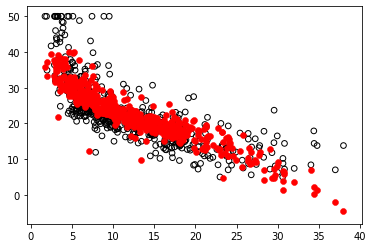

In [17]:
plot_scatter(X[:,1], y, y_pred)

In [18]:
print("R-squared score: {:.4f}".format(
    r2_score(y, y_pred)))

R-squared score: 0.6386
